In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("creditcard.csv")
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df['Class'].value_counts()      

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
X = df.drop(['Class'],axis=1)       
y = df['Class']

In [7]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

>#### Scaling X features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

>#### Splitting data into training and testing data 

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled , y , test_size=0.3, random_state=42, stratify=y)

## **Logistic Regression Model trained on original(Un-balanced data)**

In [10]:
un_bal_model = LogisticRegression(random_state=42)
un_bal_model.fit(X_train,y_train)
un_bal_model

LogisticRegression(random_state=42)

In [11]:
y_pred_un_bal = un_bal_model.predict(X_test)
y_proba_un_bal = un_bal_model.predict_proba(X_test)[:,1]
y_proba_un_bal

array([1.40795069e-04, 3.66744784e-04, 1.61099155e-04, ...,
       1.98805632e-05, 7.94063931e-05, 5.76842805e-06])

## **Balanced Model with Smote**

In [38]:
smote = SMOTE(random_state=100)
sm_data = smote.fit_resample(X,y)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)
model_smote = LogisticRegression(max_iter=1000,class_weight='balanced')
model_smote.fit(X_train_smote,y_train_smote)
model_smote

LogisticRegression(class_weight='balanced', max_iter=1000)

In [13]:
y_pred_bal = model_smote.predict(X_test)          

In [14]:
y_proba_bal = un_bal_model.predict_proba(X_test)[:,1]

>## **Random Forest Classifier trained on balanced data**

In [15]:
rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=10,random_state=100)
rf_model.fit(X_train_smote,y_train_smote)
rf_model

RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=100)

In [16]:
y_pred_rf = rf_model.predict(X_test)

In [17]:
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

>### Evaluation Metrices for model trained on original(unbalanced data)

In [18]:
cm_unBal = confusion_matrix(y_test, y_pred_un_bal)
print(cm_unBal)
print(classification_report(y_test, y_pred_un_bal))
print("Accuracy:", accuracy_score(y_test, y_pred_un_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_un_bal))

[[85279    16]
 [   59    89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.60      0.70       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9991222218320986
ROC-AUC: 0.9575370375944854


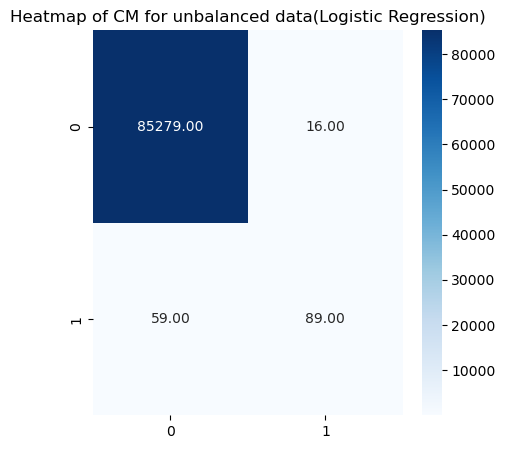

In [34]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_unBal, cmap='Blues',annot=True, fmt='.2f')
plt.title("Heatmap of CM for unbalanced data(Logistic Regression)")
plt.show()

>### Evaluation metrices for model trained on balanced data

In [20]:
print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_bal))

[[83431  1864]
 [   18   130]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.12       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy: 0.9779736198401273
ROC-AUC: 0.9575370375944854


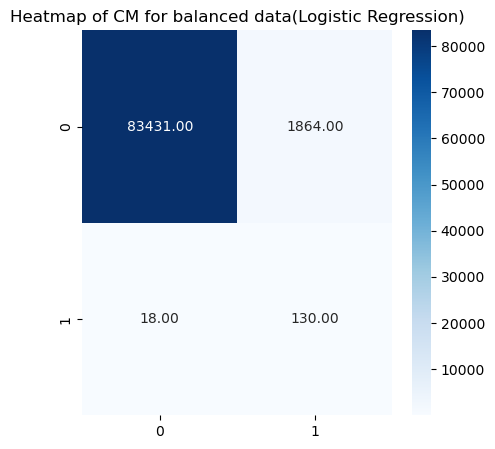

In [33]:
cm_bal = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize=(5,5))
sns.heatmap(cm_bal, cmap='Blues',annot=True, fmt='.2f')
plt.title("Heatmap of CM for balanced data(Logistic Regression)")
plt.show()

>### Evaluation metrices for Random Forest classifier on balanced data

In [62]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

[[85280    15]
 [   33   115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9994382219725431
ROC-AUC: 0.9302861848307068


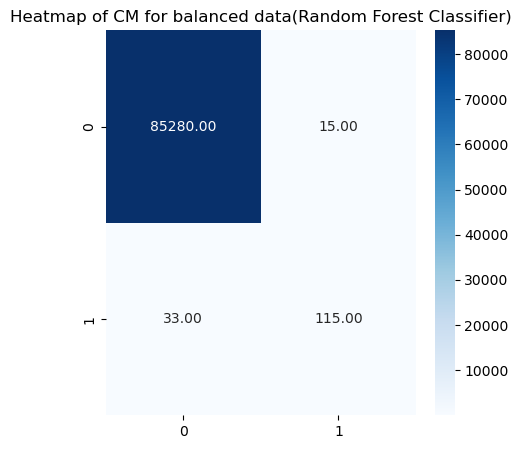

In [32]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,5))
sns.heatmap(cm_rf, cmap='Blues',annot=True, fmt='.2f')
plt.title("Heatmap of CM for balanced data(Random Forest Classifier)")
plt.show()

>### ROC curve for unbalanced data trained model

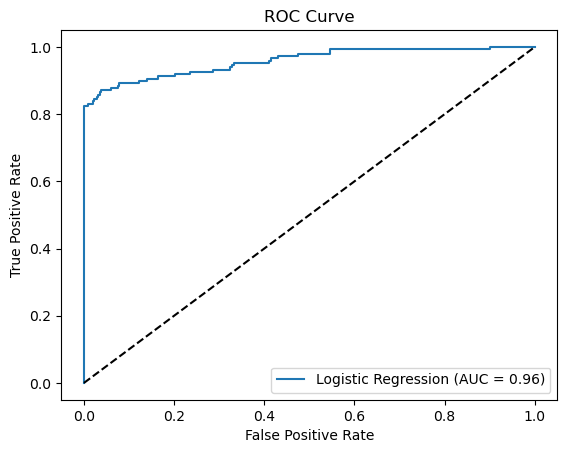

In [24]:
auc_score = roc_auc_score(y_test, y_proba_un_bal)
fpr, tpr, _ = roc_curve(y_test, y_proba_un_bal)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

>### ROC curve for balanced data trained model

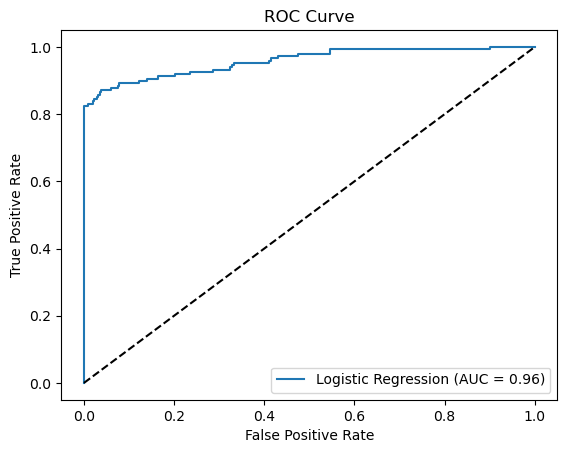

In [25]:
auc_score = roc_auc_score(y_test, y_proba_bal)
fpr, tpr, _ = roc_curve(y_test, y_proba_bal)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

>### ROC curve for Random forest classifier 

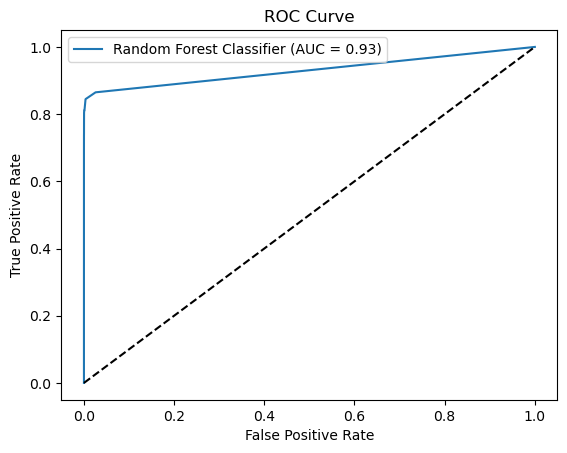

In [26]:
auc_score = roc_auc_score(y_test, y_proba_rf)
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr, tpr, label=f"Random Forest Classifier (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()

>### Feature Importance plot

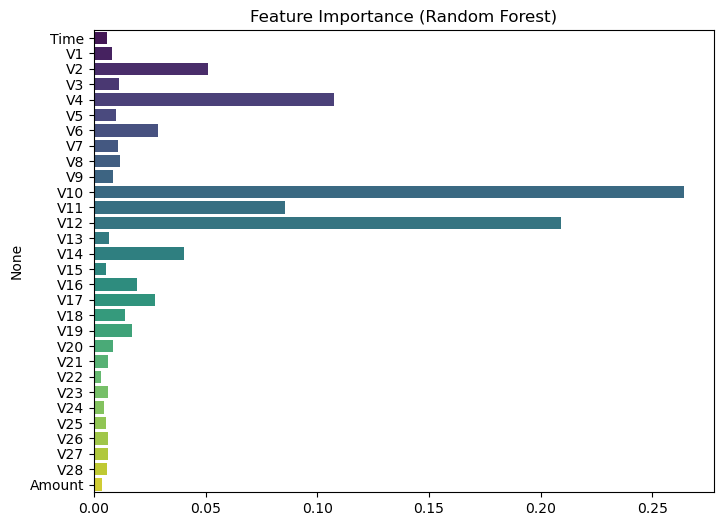

In [55]:
importances = rf_model.feature_importances_
feature_names = X.columns
sorted_features = np.argsort(importances)[::-1]
palette = sns.color_palette("viridis", len(sorted_features))
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names, palette=palette, hue=feature_names[sorted_features], legend=False)
plt.title("Feature Importance (Random Forest)")
plt.show()

>### CountPlot for Class before & after **SMOTE** 

#### Before SMOTE

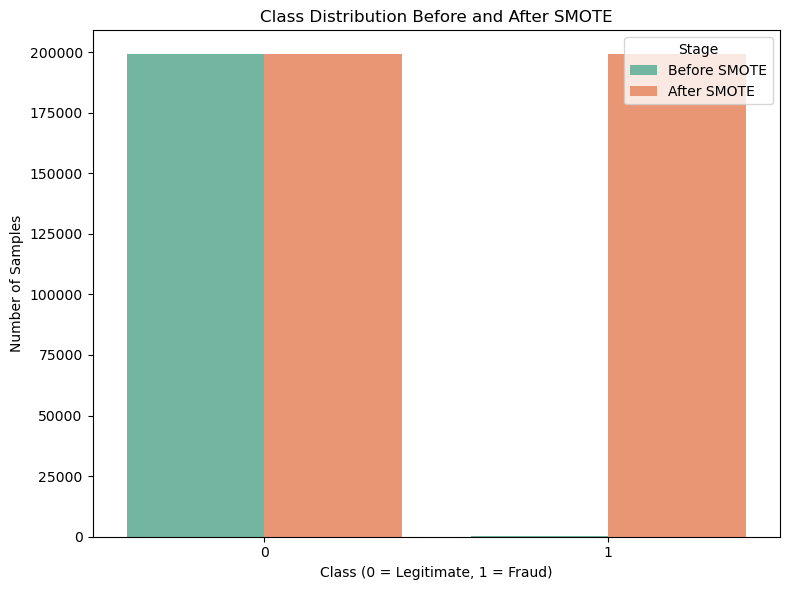

In [58]:
# --- 1. Count class distribution before SMOTE ---
class_counts_before = pd.Series(Counter(y_train), name="Count").reset_index()
class_counts_before.columns = ["Class", "Count"]
class_counts_before["Stage"] = "Before SMOTE"

# --- 2. Count class distribution after SMOTE ---
class_counts_after = pd.Series(Counter(y_train_smote), name="Count").reset_index()
class_counts_after.columns = ["Class", "Count"]
class_counts_after["Stage"] = "After SMOTE"

# --- 3. Combine both into a single DataFrame ---
class_counts_df = pd.concat([class_counts_before, class_counts_after])

# --- 4. Plot countplot ---
plt.figure(figsize=(8, 6))
sns.barplot(data=class_counts_df, x="Class", y="Count", hue="Stage", palette="Set2")
plt.title("Class Distribution Before and After SMOTE")
plt.ylabel("Number of Samples")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.tight_layout()
plt.show()


>## Predictions

In [27]:
new_transaction = [[165981.0	,-5.76687873469586	,-8.40215367768915,	0.0565432462509224	,6.9509829448522	,9.88056402552862	,-5.77319176920948,	-5.74887919911031	,0.721742893680168,	-1.07627357886614	,2.68866993252224	,-1.47514531556892,	-0.0504679838548109,	0.11350047541885	,0.98434361557577	,0.363968739240705	,-0.674356809209657,	0.327463514418321	,0.0914699151148088,	1.30794073758635	,2.49322389130791	,0.880395096548056,	-0.130435547668829	,2.24147141354365	,0.665345536539228	,-1.89004142193457	,-0.120802763842984,	0.0732685585796402	,0.583799418317518	,0.0	
]]

In [28]:
def check_transaction(model, scaler, transaction):
    transaction_scaled = scaler.transform([transaction])
    prediction = model.predict(transaction_scaled)[0]
    probability = model.predict_proba(transaction_scaled)[0][1]

    if prediction == 1:
        print("🚨 Fraudulent transaction detected!")
    else:
        print("✅ Legitimate transaction.")

    print(f"⚠️ Probability of being fraud: {probability:.2%}")

### Prediction before SMOTE on Logistic regression

In [29]:
check_transaction(un_bal_model, scaler, new_transaction[0])

✅ Legitimate transaction.
⚠️ Probability of being fraud: 0.37%


c:\Users\M Khubaib Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Prediction after SMOTE on Logistic regression

In [30]:
check_transaction(model_smote,scaler,new_transaction[0])

🚨 Fraudulent transaction detected!
⚠️ Probability of being fraud: 75.48%


c:\Users\M Khubaib Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Prediction of Random Forest Classifier after SMOTE

In [31]:
check_transaction(rf_model, scaler, new_transaction[0])

🚨 Fraudulent transaction detected!
⚠️ Probability of being fraud: 90.00%


c:\Users\M Khubaib Ahmad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
